In [11]:
#Collect Images For Face Recognition
import cv2
import numpy as np

# Load HAAR face classifier
face_classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Load functions
def face_extractor(img):
    # Function detects faces and returns the cropped face
    # If no face detected, it returns the input image
    
    #gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(img, 1.3, 5)
    
    if faces is ():
        return None
    
    # Crop all faces found
    for (x,y,w,h) in faces:
        x=x-10
        y=y-10
        cropped_face = img[y:y+h+50, x:x+w+50]

    return cropped_face

# Initialize Webcam
cap = cv2.VideoCapture(0)
count = 0

# Collect 100 samples of your face from webcam input
while True:

    ret, frame = cap.read()
    if face_extractor(frame) is not None:
        count += 1
        face = cv2.resize(face_extractor(frame), (400, 400))
        #face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)

        # Save file in specified directory with unique name
        file_name_path = 'D:/Sem-6/software/front-End/Attendance-system/Images/Sudharsan/' + str(count) + '.jpg'
        cv2.imwrite(file_name_path, face)

        # Put count on images and display live count
        cv2.putText(face, str(count), (50, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (0,255,0), 2)
        cv2.imshow('Face Cropper', face)
        
    else:
        print("Face not found")
        pass

    if cv2.waitKey(1) == 13 or count == 100: #13 is the Enter Key
        break
        
cap.release()
cv2.destroyAllWindows()      
print("Collecting Samples Complete")


<>:16: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:16: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\Santhosh\AppData\Local\Temp\ipykernel_25372\1003463508.py:16: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found


In [2]:
pip install opencv-python

     -------------------------------------- 38.2/38.2 MB 741.4 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

C:\Users\Santhosh\AppData\Local\Temp\ipykernel_25372\2586411671.py:76: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/5
10/10 [==============================] - 79s 8s/step - loss: 0.8185 - accuracy: 0.6933 - val_loss: 0.0251 - val_accuracy: 1.0000
Epoch 2/5
10/10 [==============================] - 87s 9s/step - loss: 0.0457 - accuracy: 0.9833 - val_loss: 0.0099 - val_accuracy: 1.0000
Epoch 3/5
10/10 [==============================] - 86s 9s/step - loss: 0.0103 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 4/5
10/10 [==============================] - 88s 10s/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 3.8429e-04 - val_accuracy: 1.0000
Epoch 5/5
10/10 [==============================] - 93s 10s/step - loss: 6.5513e-04 - accuracy: 1.0000 - val_loss: 2.1099e-04 - val_accuracy: 1.0000


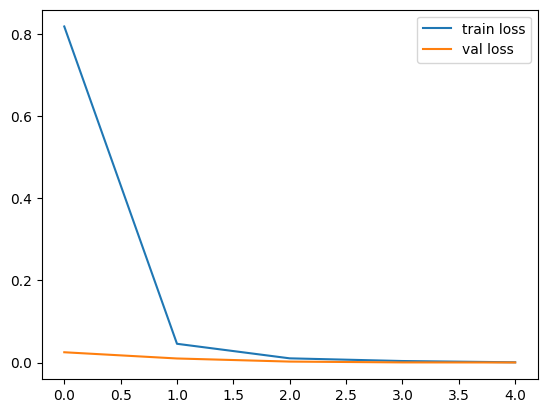

<Figure size 640x480 with 0 Axes>

In [13]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/Train'
valid_path = 'Datasets/Test'

# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False
  

  
  # useful for getting number of classes
folders = glob('Datasets/Train/*')
  

# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('Datasets/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('Datasets/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

'''r=model.fit_generator(training_set,
                         samples_per_epoch = 8000,
                         nb_epoch = 5,
                         validation_data = test_set,
                         nb_val_samples = 2000)'''

# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies


import tensorflow as tf

from keras.models import load_model

model.save('facefeatures_new_model_final_final.h5')

In [1]:
pip install keras

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [14]:
from PIL import Image
from keras.applications.vgg16 import preprocess_input
import base64
from io import BytesIO
import json
import random
import cv2
from keras.models import load_model
import numpy as np
import rsa

# from cryptography.fernet import Fernet

publicKey, privateKey = rsa.newkeys(512)
with open('key.pem', 'a') as f:
    f.writelines(f'\n{privateKey}')

from keras.preprocessing import image
model = load_model('facefeatures_new_model_final_final.h5')



# Loading the cascades
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

def face_extractor(img):
    # Function detects faces and returns the cropped face
    # If no face detected, it returns the inpu
    # t image
    
    #gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(img, 1.3, 5)
    
    if faces is ():
        return None
    
    # Crop all faces found
    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,255),2)
        cropped_face = img[y:y+h, x:x+w]

    return cropped_face

# Doing some Face Recognition with the webcam
video_capture = cv2.VideoCapture(0)
while True:
    _, frame = video_capture.read()
    #canvas = detect(gray, frame)
    #image, face =face_detector(frame)
    
    face=face_extractor(frame)
    if type(face) is np.ndarray:
        face = cv2.resize(face, (224, 224))
        im = Image.fromarray(face, 'RGB')
           #Resizing into 128x128 because we trained the model with this image size.
        img_array = np.array(im)
                    #Our keras model used a 4D tensor, (images x height x width x channel)
                    #So changing dimension 128x128x3 into 1x128x128x3 
        img_array = np.expand_dims(img_array, axis=0)
        pred = model.predict(img_array)
        print(pred)
                     
        name="None matching"
        
        if(pred[0][0]>0.5):
            name='Hanush'
            # encMessage = rsa.encrypt(name.encode(), publicKey)
            # decMessage = rsa.decrypt(encMessage, privateKey).decode()
            with open('sample.txt','a') as f:
                f.writelines(f'\n{name}')
        if(pred[0][1]>0.5):
            name='Santhosh'
            # encMessage = rsa.encrypt(name.encode(), publicKey)
            # decMessage = rsa.decrypt(encMessage, privateKey).decode()
            with open('sample.txt','a') as f:
                f.writelines(f'\n{name}')
        if(pred[0][1]>0.5):
            name='Sudharsan'
            # encMessage = rsa.encrypt(name.encode(), publicKey)
            # decMessage = rsa.decrypt(encMessage, privateKey).decode()
            with open('sample.txt','a') as f:
                f.writelines(f'\n{name}')
        # if(pred[0][3]>0.5):
        #     name='Tom'
        #     with open('sample.txt','r+') as f:
        #         f.writelines(f'\n{name}')
        cv2.putText(frame,name, (50, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (0,255,0), 2)
    else:
        cv2.putText(frame,"No face found", (50, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (0,255,0), 2)
    cv2.imshow('Video', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
video_capture.release()
cv2.destroyAllWindows()

<>:34: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:34: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\Santhosh\AppData\Local\Temp\ipykernel_4392\3277114637.py:34: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


1/1 [==============================] - 0s 363ms/step
[[4.0028817e-11 1.0000000e+00 4.9095046e-19]]
1/1 [==============================] - 0s 136ms/step
[[0. 1. 0.]]
1/1 [==============================] - 0s 143ms/step
[[1.0620751e-26 1.0000000e+00 0.0000000e+00]]
1/1 [==============================] - 0s 160ms/step
[[1.9827306e-07 9.9999976e-01 0.0000000e+00]]
1/1 [==============================] - 0s 152ms/step
[[1.0000000e+00 1.3950339e-10 1.5833488e-21]]
1/1 [==============================] - 0s 159ms/step
[[9.404572e-22 1.000000e+00 0.000000e+00]]
1/1 [==============================] - 0s 156ms/step
[[1.1715868e-31 1.0000000e+00 0.0000000e+00]]
1/1 [==============================] - 0s 160ms/step
[[9.9999940e-01 5.9654684e-07 2.3783676e-19]]
1/1 [==============================] - 0s 135ms/step
[[0. 1. 0.]]
1/1 [==============================] - 0s 145ms/step
[[1.000000e+00 1.199677e-08 9.286034e-38]]
1/1 [==============================] - 0s 150ms/step
[[1.8400457e-12 1.0000000e+00

In [5]:
pip install tensorflow

     |████████████████████████████████| 217.5 MB 1.6 MB/s eta 0:00:01
     |████████████████████████████████| 5.8 MB 77 kB/s eta 0:00:013
     |████████████████████████████████| 57 kB 1.6 MB/s eta 0:00:01
     |████████████████████████████████| 961 kB 1.6 MB/s eta 0:00:01
     |████████████████████████████████| 4.0 MB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 3.1 MB 2.0 MB/s eta 0:00:01
     |████████████████████████████████| 462 kB 2.0 MB/s eta 0:00:01
     |████████████████████████████████| 126 kB 1.4 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 1.5 MB/s eta 0:00:01
     |████████████████████████████████| 13.0 MB 1.8 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 719 kB/s eta 0:00:01
  Using cached wheel-0.37.1-py2.py3-none-any.whl (35 kB)
     |████████████████████████████████| 289 kB 1.5 MB/s eta 0:00:01
     |████████████████████████████████| 3.5 MB 86 kB/s eta 